In [1]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Make new directory named 'Scene_Graph_Generator'
%cd drive/My Drive/
! mkdir Scene_Graph_Generator
%cd Scene_Graph_Generator

/content/drive/My Drive
/content/drive/My Drive/Scene_Graph_Generator


In [3]:
# Cloning GitHub repository
! git clone https://github.com/danyalsaqib/SGG_Custom

Cloning into 'SGG_Custom'...
remote: Enumerating objects: 774, done.
remote: Counting objects: 100% (774/774), done.
remote: Compressing objects: 100% (599/599), done.
remote: Total 774 (delta 172), reused 764 (delta 162), pack-reused 0
Receiving objects: 100% (774/774), 45.02 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Checking out files: 100% (864/864), done.


In [4]:
# Downloading pretrained models
! wget -O ucms.zip "https://onedrive.live.com/download?cid=22376FFAD72C4B64&resid=22376FFAD72C4B64%21781947&authkey=AF_EM-rkbMyT3gs"

--2021-07-05 17:55:42--  https://onedrive.live.com/download?cid=22376FFAD72C4B64&resid=22376FFAD72C4B64%21781947&authkey=AF_EM-rkbMyT3gs
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://k9inea.sn.files.1drv.com/y4mCSf9-ItS9wwcIvoe_FsJwGzNY1cI12u-LlPbnQR2eObfaCrE5FCiU-2oT804StO5ISUd1q9nxy8t2eq2RCrUuSykq4ucA6IQscLHmH3PRWnIOlxAcx67KWQ2mDa_YV63RF8E3fXbdZGA8PF5XRZaelyUy_jSHXAszCbBE4so2SzjR4NnTu03_qL1wFSqub1ucUj5a17XO_Hpx2-ghavuFQ/upload_causal_motif_sgdet.zip?download&psid=1 [following]
--2021-07-05 17:55:43--  https://k9inea.sn.files.1drv.com/y4mCSf9-ItS9wwcIvoe_FsJwGzNY1cI12u-LlPbnQR2eObfaCrE5FCiU-2oT804StO5ISUd1q9nxy8t2eq2RCrUuSykq4ucA6IQscLHmH3PRWnIOlxAcx67KWQ2mDa_YV63RF8E3fXbdZGA8PF5XRZaelyUy_jSHXAszCbBE4so2SzjR4NnTu03_qL1wFSqub1ucUj5a17XO_Hpx2-ghavuFQ/upload_causal_motif_sgdet.zip?download&psid=1
Resolving k9inea.sn.file

In [5]:
%cd SGG_Custom

/content/drive/My Drive/Scene_Graph_Generator/SGG_Custom


In [6]:
# Install Dependencies
! python3.7 -m pip install ipython
! python3.7 -m pip install scipy
! python3.7 -m pip install h5py
! python3.7 -m pip install ninja yacs cython matplotlib tqdm opencv-python overrides
#! python3.7 -m pip install pytorch torchvision cudatoolkit -c pytorch
#! python3.7 -m pip install pytorch==1.5.0 torchvision==0.5.0 cudatoolkit==10.2
! python3.7 -m pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [7]:
# Installing cocoapi
%cd ..
! git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
! python setup.py build_ext install

/content/drive/My Drive/Scene_Graph_Generator
Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/drive/My Drive/Scene_Graph_Generator/cocoapi/PythonAPI
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/My Drive/Scene_Graph_Generator/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 

In [8]:
# Installing apex
%cd ..
%cd ..
! git clone https://github.com/NVIDIA/apex.git
%cd apex
! python setup.py install #--cuda_ext --cpp_ext

/content/drive/My Drive/Scene_Graph_Generator/cocoapi
/content/drive/My Drive/Scene_Graph_Generator
Cloning into 'apex'...
remote: Enumerating objects: 8054, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 8054 (delta 68), reused 101 (delta 47), pack-reused 7913
Receiving objects: 100% (8054/8054), 14.11 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (5467/5467), done.
Checking out files: 100% (343/343), done.
/content/drive/My Drive/Scene_Graph_Generator/apex


torch.__version__  = 1.9.0+cu102


setup.py:67: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
running install
running bdist_egg
running egg_info
creating apex.egg-info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing top-level names to apex.egg-info/top_level.txt
writing manifest file 'apex

In [9]:
# Installing the actual SGG library
%cd ..
%cd SGG_Custom
! python setup.py build develop

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Scene_Graph_Generator/SGG_Custom/maskrcnn_benchmark/csrc/cpu/nms_cpu.cpp:35:8: warning: ‘T* at::Tensor::data() const [with T = float]’ is deprecated: Tensor.data<T>() is deprecated. Please use Tensor.data_ptr<T>() instead. [-Wdeprecated-declarations]
   auto areas = areas_t.data<scalar_t>();
        ^~~~~
In file included from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/Tensor.h:3:0,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/Context.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/ATen.h:9,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/inc

In [10]:
# Import Libraries
import argparse
import os

from PIL import Image
import json

import torch

In [11]:
# module for tracking the training process
from tqdm import tqdm_notebook

In [12]:
!ls

ABSTRACTIONS.md     docker			 requirements.txt
build		    INSTALL.md			 Setup.ipynb
CODE_OF_CONDUCT.md  last_checkpoint		 setup.py
configs		    LICENSE			 tests
config.yml	    maskrcnn_benchmark		 tools
DATASET.md	    maskrcnn_benchmark.egg-info  TROUBLESHOOTING.md
datasets	    METRICS.md			 visualization
demo		    README.md


In [13]:
# Importing local dependencies

from maskrcnn_benchmark.utils.env import setup_environment

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.data_2 import make_data_loader
from maskrcnn_benchmark.engine_2.inference import inference
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.utils.checkpoint import DetectronCheckpointer
from maskrcnn_benchmark.utils.collect_env import collect_env_info
from maskrcnn_benchmark.utils.comm import synchronize, get_rank
from maskrcnn_benchmark.utils.logger import setup_logger
from maskrcnn_benchmark.utils.miscellaneous import mkdir

In [14]:
try:
    from apex import amp
except ImportError:
    raise ImportError('Use APEX for mixed precision via apex.amp')

In [15]:
%cd ..
! mkdir upload_causal_motif_sgdet
! mkdir glove
! unzip ucms.zip -d upload_causal_motif_sgdet/
! ls

/content/drive/My Drive/Scene_Graph_Generator
Archive:  ucms.zip
  inflating: upload_causal_motif_sgdet/config.yml  
  inflating: upload_causal_motif_sgdet/labels.json  
  inflating: upload_causal_motif_sgdet/last_checkpoint  
  inflating: upload_causal_motif_sgdet/log.txt  
  inflating: upload_causal_motif_sgdet/model_0028000.pth  
  inflating: upload_causal_motif_sgdet/VG_stanford_filtered_with_attribute_train_statistics.cache  
apex  cocoapi  glove  SGG_Custom  ucms.zip  upload_causal_motif_sgdet


In [16]:
! cp SGG_Custom/config.yml upload_causal_motif_sgdet/config.yml
! cp SGG_Custom/last_checkpoint upload_causal_motif_sgdet/last_checkpoint
! ls

apex  cocoapi  glove  SGG_Custom  ucms.zip  upload_causal_motif_sgdet


In [17]:
! mkdir checkpoints
%cd checkpoints
! mkdir custom_images
! mkdir your_output_path
! ls
%cd ..

/content/drive/My Drive/Scene_Graph_Generator/checkpoints
custom_images  your_output_path
/content/drive/My Drive/Scene_Graph_Generator


In [18]:
def im2scenegraph(tst_img, MPDC):
    # CUSTOMIZABLES FOR RUNNING AN SGG

    # The Glove Directory Path
    GD = 'glove/'

    # Pretrained Model Path
    #MPDC = 'D:\\Downloads\\upload_causal_motif_sgdet'

    # Output Directory if default VGG dataset is used
    OD = 'upload_causal_motif_sgdet/'

    # If evaluation should be done on custom images, set this 'True'
    TCE = 'True'

    # The path for custom images for SGG detection, if TEST.CUSTUM_EVAL is 'True'
    TCP = 'checkpoints/custom_images'

    # The path for output of SGG for custom images, if TEST.CUSTUM_EVAL is 'True'
    DSD = 'checkpoints/your_output_path'

    configuration_file = "SGG_Custom/configs/e2e_relation_X_101_32_8_FPN_1x.yaml"
    option_txt = ['MODEL.ROI_RELATION_HEAD.USE_GT_BOX', 'False', 'MODEL.ROI_RELATION_HEAD.USE_GT_OBJECT_LABEL', 'False',
    'MODEL.ROI_RELATION_HEAD.PREDICTOR', 'CausalAnalysisPredictor', 'MODEL.ROI_RELATION_HEAD.CAUSAL.EFFECT_TYPE', 'TDE',
    'MODEL.ROI_RELATION_HEAD.CAUSAL.FUSION_TYPE', 'sum', 'MODEL.ROI_RELATION_HEAD.CAUSAL.CONTEXT_LAYER', 'motifs',
    'TEST.IMS_PER_BATCH', '1', 'DTYPE', 'float16', 'GLOVE_DIR', GD, 'MODEL.PRETRAINED_DETECTOR_CKPT', MPDC,
    'OUTPUT_DIR', OD, 'TEST.CUSTUM_EVAL', TCE, 'TEST.CUSTUM_PATH', TCP, 'DETECTED_SGG_DIR', DSD]
    parser = argparse.ArgumentParser(description="PyTorch Object Detection Inference")
    parser.add_argument(
        "--config-file",
        default="/private/home/fmassa/github/detectron.pytorch_v2/configs/e2e_faster_rcnn_R_50_C4_1x_caffe2.yaml",
        metavar="FILE",
        help="path to config file",
    )
    parser.add_argument("--local_rank", type=int, default=0)
    parser.add_argument(
        "opts",
        help="Modify config options using the command-line",
        default=None,
        nargs=argparse.REMAINDER,
    )

    args = parser.parse_args(args=[])

    num_gpus = int(os.environ["WORLD_SIZE"]) if "WORLD_SIZE" in os.environ else 1
    distributed = num_gpus > 1

    if distributed:
        torch.cuda.set_device(args.local_rank)
        torch.distributed.init_process_group(
            backend="nccl", init_method="env://"
        )
        synchronize()

    #cd SGG_Custom
    cfg.merge_from_file(configuration_file)
    cfg.merge_from_list(option_txt)
    #print("Merging from list:")
    #print(args.opts)
    #cfg.merge_from_file(args.config_file)
    #cfg.merge_from_list(args.opts)
    cfg.freeze()

    save_dir = ""
    logger = setup_logger("maskrcnn_benchmark", save_dir, get_rank())
    logger.info("Using {} GPUs".format(num_gpus))
    logger.info(cfg)

    logger.info("Collecting env info (might take some time)")
    logger.info("\n" + collect_env_info())

    model = build_detection_model(cfg)
    model.to(cfg.MODEL.DEVICE)

    # Initialize mixed-precision if necessary
    use_mixed_precision = cfg.DTYPE == 'float16'
    amp_handle = amp.init(enabled=use_mixed_precision, verbose=cfg.AMP_VERBOSE)

    output_dir = cfg.OUTPUT_DIR
    print("ESP - Output Dir: ", output_dir)
    #print("Printing CFG: \n", cfg)
    #print("Printing Model: \n", model)
    checkpointer = DetectronCheckpointer(cfg, model, save_dir=output_dir)
    print("cfg.MODEL.WEIGHT: ", cfg.MODEL.WEIGHT)
    _ = checkpointer.load(cfg.MODEL.WEIGHT)

    iou_types = ("bbox",)
    if cfg.MODEL.MASK_ON:
        iou_types = iou_types + ("segm",)
    if cfg.MODEL.KEYPOINT_ON:
        iou_types = iou_types + ("keypoints",)
    if cfg.MODEL.RELATION_ON:
        iou_types = iou_types + ("relations", )
    if cfg.MODEL.ATTRIBUTE_ON:
        iou_types = iou_types + ("attributes", )
    output_folders = [None] * len(cfg.DATASETS.TEST)
    dataset_names = cfg.DATASETS.TEST
    if cfg.OUTPUT_DIR:
        for idx, dataset_name in enumerate(dataset_names):
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference", dataset_name)
            mkdir(output_folder)
            output_folders[idx] = output_folder

    #tst_img = Image.open('tools/horse.jpg').convert("RGB")
    data_loaders_val, custom_data_info = make_data_loader(cfg, tst_img, mode="test", is_distributed=distributed)
    for output_folder, dataset_name, data_loader_val in zip(output_folders, dataset_names, data_loaders_val):
        custom_prediction = inference(
            cfg,
            model,
            data_loader_val,
            dataset_name=dataset_name,
            iou_types=iou_types,
            box_only=False if cfg.MODEL.RETINANET_ON else cfg.MODEL.RPN_ONLY,
            device=cfg.MODEL.DEVICE,
            expected_results=cfg.TEST.EXPECTED_RESULTS,
            expected_results_sigma_tol=cfg.TEST.EXPECTED_RESULTS_SIGMA_TOL,
            output_folder=output_folder,
        )
        synchronize()
        output_dict = {
            'custom_data_info': custom_data_info,
            'custom_prediction': custom_prediction
        }
        #cd ..
        return output_dict

In [19]:
torch.cuda.is_available()

True

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [21]:
image = Image.open('SGG_Custom/tools/bike.jpg').convert("RGB")
pretrained_model_path = 'upload_causal_motif_sgdet/'

output = im2scenegraph(image, pretrained_model_path)

#with open(os.path.join('C:/Downloads', 'custom_data_info.json'), 'w') as outfile:
#    json.dump(output['custom_data_info'], outfile)

#with open(os.path.join('C:/Downloads', 'custom_prediction.json'), 'w') as outfile:  
#    json.dump(output['custom_prediction'], outfile)

2021-07-05 18:03:30,372 maskrcnn_benchmark INFO: Using 1 GPUs
2021-07-05 18:03:30,373 maskrcnn_benchmark INFO: AMP_VERBOSE: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 1
  SIZE_DIVISIBILITY: 5
DATASETS:
  TEST: ('VG_stanford_filtered_with_attribute_test',)
  TRAIN: ('VG_stanford_filtered_with_attribute_train',)
  VAL: ('VG_stanford_filtered_with_attribute_val',)
DETECTED_SGG_DIR: checkpoints/your_output_path
DTYPE: float16
GLOVE_DIR: glove/
INPUT:
  BRIGHTNESS: 0.0
  CONTRAST: 0.0
  HUE: 0.0
  MAX_SIZE_TEST: 100
  MAX_SIZE_TRAIN: 100
  MIN_SIZE_TEST: 100
  MIN_SIZE_TRAIN: (100,)
  PIXEL_MEAN: [102.9801, 115.9465, 122.7717]
  PIXEL_STD: [1.0, 1.0, 1.0]
  SATURATION: 0.0
  TO_BGR255: True
  VERTICAL_FLIP_PROB_TRAIN: 0.0
MODEL:
  ATTRIBUTE_ON: False
  BACKBONE:
    CONV_BODY: R-101-FPN
    FREEZE_CONV_BODY_AT: 2
  CLS_AGNOSTIC_BBOX_REG: False
  DEVICE: cuda
  FBNET:
    ARCH: default
    ARCH_DEF: 
    BN_TYPE: bn
    DET_HEAD_BLOCKS: []
    DET_HEAD_LAST_SCALE: 1.0
   

glove.6B.200d: 100%|█████████▉| 862M/862M [02:42<00:00, 4.38MB/s]

extracting word vectors into glove/


glove.6B.200d: 862MB [03:18, 4.34MB/s]                           
loading word vectors from glove/glove.6B.200d.txt: 100%|██████████| 400000/400000 [00:33<00:00, 11958.34it/s]


__background__ -> __background__ 
fail on __background__
loading word vectors from glove/glove.6B.200d.pt
__background__ -> __background__ 
fail on __background__
ESP - Output Dir:  upload_causal_motif_sgdet/
cfg.MODEL.WEIGHT:  catalog://ImageNetPretrained/FAIR/20171220/X-101-32x8d
2021-07-05 18:07:54,787 maskrcnn_benchmark.utils.checkpoint INFO: Loading checkpoint from upload_causal_motif_sgdet/model_0028000.pth
=====> checkpoints/your_output_path/custom_data_info.json SAVED !
2021-07-05 18:08:49,054 maskrcnn_benchmark.inference INFO: Start evaluation on VG_stanford_filtered_with_attribute_test dataset(1 images).


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

2021-07-05 18:08:50,082 maskrcnn_benchmark.inference INFO: Total run time: 0:00:01.025877 (1.025876760482788 s / img per device, on 1 devices)
2021-07-05 18:08:50,083 maskrcnn_benchmark.inference INFO: Model inference time: 0:00:00.687908 (0.6879079341888428 s / img per device, on 1 devices)


=====> checkpoints/your_output_path/custom_prediction.json SAVED !


In [22]:
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [23]:
# load the following to files from DETECTED_SGG_DIR
#custom_prediction = json.load(open('C:/Users/danya/checkpoints/your_output_path/custom_prediction.json'))
#custom_data_info = json.load(open('C:/Users/danya/checkpoints/your_output_path/custom_data_info.json'))
custom_prediction = output['custom_prediction']
custom_data_info = output['custom_data_info']
print(custom_prediction)
print(custom_data_info)

{'0': {'bbox': [[11.25, 7.23046875, 89.1875, 65.5], [9.03125, 8.1953125, 86.4375, 67.125], [23.46875, 2.87890625, 71.25, 42.375], [23.546875, 5.125, 75.0625, 43.40625], [33.25, 0.54345703125, 58.875, 52.65625], [15.109375, 12.3828125, 75.625, 47.15625], [26.5625, 10.2265625, 86.0625, 34.53125], [47.65625, 1.400390625, 64.375, 23.9375], [49.71875, 2.6328125, 68.875, 33.65625], [21.546875, 34.125, 43.8125, 65.0], [35.59375, 1.955078125, 80.0625, 26.9375], [24.984375, 19.25, 60.71875, 64.3125], [38.25, 29.96875, 89.25, 48.46875], [57.5625, 14.171875, 84.3125, 62.375], [47.5, 31.03125, 92.0, 61.15625], [73.875, 13.265625, 90.0, 52.03125], [51.1875, 13.3671875, 82.3125, 61.5625], [30.328125, 22.6875, 53.34375, 65.875], [52.0, 33.4375, 92.25, 62.0625], [15.046875, 11.25, 74.0, 36.25], [6.1875, 7.28515625, 93.1875, 63.21875], [75.9375, 13.9375, 93.6875, 58.0], [19.625, 1.1884765625, 65.25, 29.640625], [52.65625, 1.9990234375, 68.6875, 28.078125], [63.9375, 32.71875, 92.9375, 61.96875], [26.5,

In [27]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    size = np.array(get_size(pic.size))
    #print(size)
    lol = size/100
    lol[0] = int(lol[0])
    lol[1] = int(lol[1])
    #print(lol)
    x1 = x1 * lol[0]
    x2 = x2 * lol[0]
    y1 = y1 * lol[1]
    y2 = y2 * lol[1]
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(pic, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(pic.size)
    #pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    #pic = pic.resize(Image.open(img_path).size)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [28]:
# parameters
image_idx = 0
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

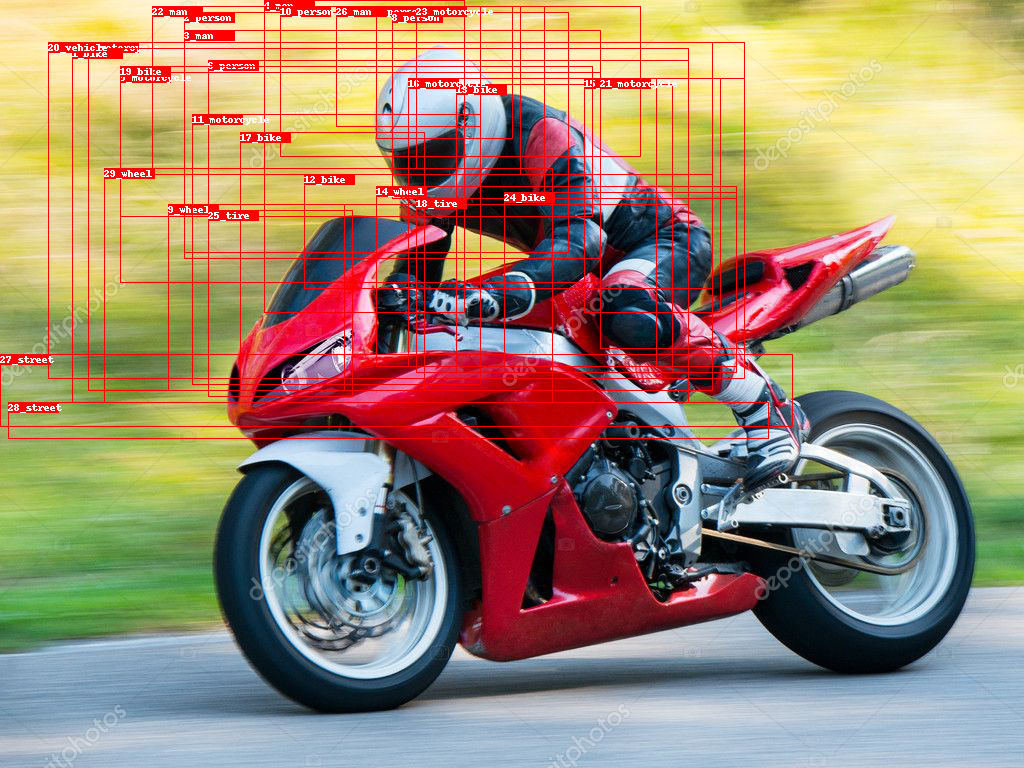

**************************************************
box_labels 0: motorcycle; score: 0.6943163275718689
box_labels 1: bike; score: 0.23779509961605072
box_labels 2: person; score: 0.1451617032289505
box_labels 3: man; score: 0.05739455297589302
box_labels 4: man; score: 0.046767570078372955
box_labels 5: motorcycle; score: 0.04635747894644737
box_labels 6: person; score: 0.03301706165075302
box_labels 7: person; score: 0.030111877247691154
box_labels 8: person; score: 0.026369404047727585
box_labels 9: wheel; score: 0.025704331696033478
box_labels 10: person; score: 0.02403384819626808
box_labels 11: motorcycle; score: 0.020863842219114304
box_labels 12: bike; score: 0.02086106687784195
box_labels 13: bike; score: 0.02067144401371479
box_labels 14: wheel; score: 0.018359888345003128
box_labels 15: bike; score: 0.01780593954026699
box_labels 16: motorcycle; score: 0.01528667937964201
box_labels 17: bike; score: 0.01425898727029562
box_labels 18: tire; score: 0.013041957281529903
box_labe

In [29]:
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)